<a href="https://colab.research.google.com/github/MohammedAbraar302/pet-adoption-system/blob/main/AIML_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

# load and splits the dataset into training and testing

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
X_test.shape

(10000, 28, 28)

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

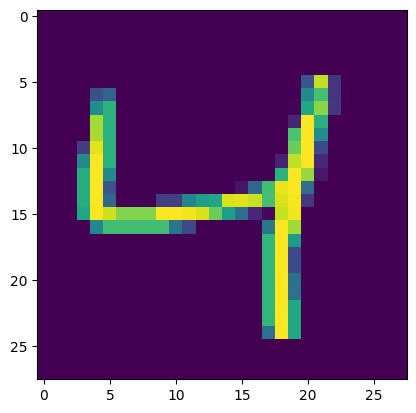

In [32]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [33]:
X_train = X_train/255
X_test = X_test/255

# normalises pixel values of images
'''
Why 255?
Each image is 28×28 pixels, and each pixel value ranges from 0 to 255 (grayscale intensity).

Dividing by 255 scales all pixel values to a range of 0.0 to 1.0.

'''

'\nWhy 255?\nEach image is 28×28 pixels, and each pixel value ranges from 0 to 255 (grayscale intensity).\n\nDividing by 255 scales all pixel values to a range of 0.0 to 1.0.\n\n'

In [34]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [36]:
model = Sequential() # initialises a seqential model, so basically the layers are added one after the other
# so the models output from one layer is passed on as input to the next layer

model.add(Flatten(input_shape=(28,28))) # 2D input to 1D vector
model.add(Dense(64,activation='relu')) # rectified linear unit(turns -ve to zeros and keeps positive as is)
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax')) # converts raw output values into probabilities


In [37]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# loss function is used to calculate how well the model's predictions match the actual labels during training
# Sparse Categorical Cross-Entropy because of multi class classfication
# optimizer controls how the models weights are updated

In [21]:
history = model.fit(X_train,y_train,batch_size=64, epochs=50,validation_split=0.2)
#bascially trains the model on data to classify images into correct labels and
#epochs is how many times the models will look at the training dataset
#20% of the training data will be used for validation during training
#history object keeps track of how well the model did during each epoch.

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9851 - loss: 0.0525 - val_accuracy: 0.9618 - val_loss: 0.1915
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9830 - loss: 0.0551 - val_accuracy: 0.9640 - val_loss: 0.1782
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9849 - loss: 0.0528 - val_accuracy: 0.9613 - val_loss: 0.2282
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9844 - loss: 0.0545 - val_accuracy: 0.9649 - val_loss: 0.2113
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9873 - loss: 0.0466 - val_accuracy: 0.9672 - val_loss: 0.1981
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9860 - loss: 0.0488 - val_accuracy: 0.9634 - val_loss: 0.1988
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9869 - loss: 0.0463 - val_accuracy: 0.9634 - val_loss: 0.1971
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9868 - loss: 0.0460 - val_accuracy: 0.

In [41]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
#y_prob contains the predicted probabilities for each
#argmax() is a function that returns the index of the maximum value in an array

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [44]:
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test,y_pred))

Test Accuracy: 0.1095


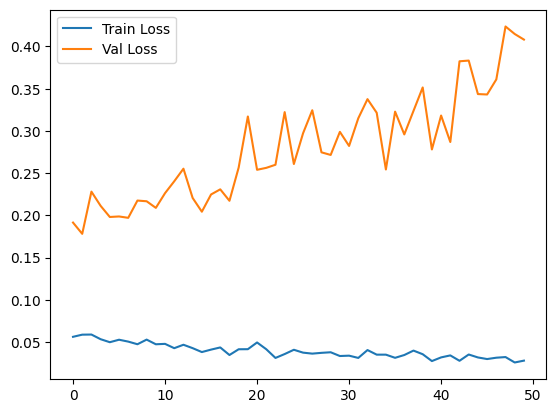

In [46]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

#Training loss: How well the model is learning on the training data.



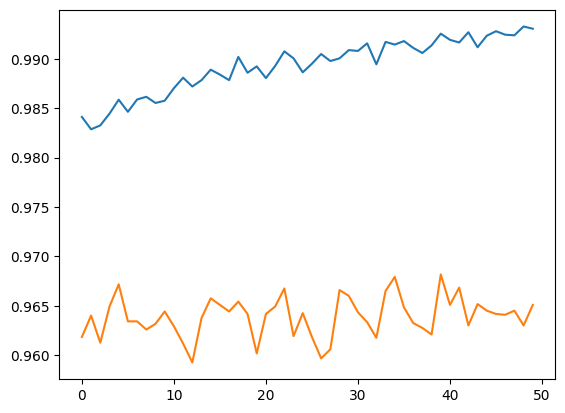

In [47]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracry')

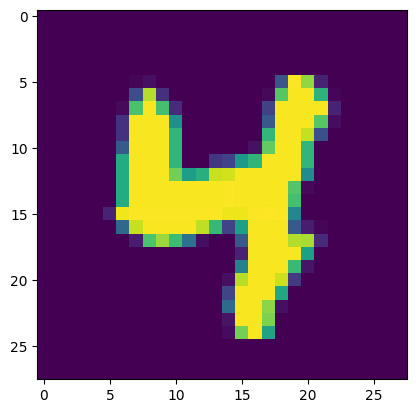

In [48]:
plt.imshow(X_test[85])

In [49]:
model.predict(X_test[85].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([3])